In [3]:
import torch
import numpy as np
import torch.nn as nn
import copy
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from lovely_numpy import lo
import scipy
import json
import cv2

/datagrid/personal/baljibil/repos/env-vitpose/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ROOT_FOLDER = "/datagrid/personal/baljibil"
# ground truth
with open(ROOT_FOLDER + '/repos/scripts/data/mpii_pred_on_coco_resnet.json', 'r') as f:
    annot_pred_mpii = json.load(f)
# prediction
with open(ROOT_FOLDER + '/data/COCO/original/annotations/person_keypoints_val2017.json', 'r') as f:
    annot_truth = json.load(f)
    
with open(ROOT_FOLDER + '/repos/ViTPose/work_dirs/vitPose+_base_coco+aic+mpii+ap10k+apt36k+wholebody_256x192_udp/result_keypoints.json', 'r') as f:
    annot_hacked_mpii = json.load(f)

[422.1109619140625, 306.4428405761719, 0.8813533186912537, 387.8803405761719, 191.99990844726562, 0.8739624619483948, 426.44207763671875, 260.2434997558594, 0.7928419709205627, 442.3099365234375, 259.6909484863281, 0.7681333422660828, 388.1372375488281, 192.71597290039062, 0.8849942684173584, 443.76220703125, 306.45245361328125, 0.9273567199707031, 434.2942199707031, 259.9063720703125, 0.8779777884483337, 388.2282409667969, 192.57821655273438, 1.1613472700119019, 387.85845947265625, 193.16986083984375, 1.1478675603866577, 388.9828186035156, 192.5194091796875, 0.8594841361045837, 424.3662109375, 263.1527404785156, 0.9240121841430664, 416.34375, 248.93707275390625, 0.9196516871452332, 413.8972473144531, 228.79843139648438, 0.9144925475120544, 442.0019836425781, 228.87814331054688, 0.8996064066886902, 387.7002258300781, 192.1065673828125, 0.9196732640266418, 436.1589660644531, 265.3343505859375, 0.893392026424408]
48


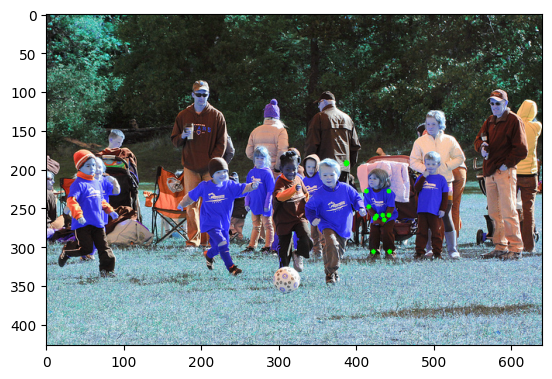

In [30]:
instance = annot_hacked_mpii[100]
print(instance['keypoints'])
print(len(instance['keypoints']))
image = cv2.imread(ROOT_FOLDER + '/data/COCO/original/val2017/' + "000000" + f"{instance['image_id']}.jpg")

for i in range(0,len(instance['keypoints']), 3):
  kp = instance['keypoints']
  x, y = int(kp[i]), int(kp[i+1])
  cv2.circle(image, (x, y), 3, (0, 255, 0, 150), -1)
plt.imshow(image)